# General info

In [69]:
### STREAMING
MEDALS_table

### BATCH
All the rest

SyntaxError: invalid syntax. Perhaps you forgot a comma? (Temp/ipykernel_5312/3783967784.py, line 5)

# Python script for dashboard

## Import table

In [1]:
# libraries needed for data import
from google.cloud import bigquery
from google.oauth2 import service_account
import os
import json
import pandas as pd
import pandas_gbq
pd.options.display.max_columns = 50
pd.options.display.max_rows = 100

# libraries needed for data processing, plotting and dashboard
import streamlit as st
import matplotlib.pyplot as plt

In [13]:
# define dataset credentials and names
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "credentials.json"
gbq_project_id = 'de2021-iona-325413'

In [17]:
# open credentials
with open('../../credentials.json') as f:
    data = json.load(f)
cred_json = pd.json_normalize(data)

In [18]:
# define abbreviations
credentials = service_account.Credentials.from_service_account_file(
    '../../credentials.json', scopes=["https://www.googleapis.com/auth/cloud-platform"],)

In [19]:
# query for Google bigquery
sql =  """ SELECT * FROM `de2021-iona-325413.assignment2.overview_athletes_disc_per_country` """ # change for different table
df = pandas_gbq.read_gbq(sql, project_id=gbq_project_id, dialect="standard")

GenericGBQException: Reason: 403 POST https://bigquery.googleapis.com/bigquery/v2/projects/de2021-iona-325413/jobs?prettyPrint=false: Access Denied: Project de2021-iona-325413: User does not have bigquery.jobs.create permission in project de2021-iona-325413.

(job ID: 32e8398c-689d-4cd6-9ecf-9ac8e4523e18)

                            -----Query Job SQL Follows-----                             

    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |
   1: SELECT * FROM `de2021-iona-325413.assignment2.overview_athletes_disc_per_country` 
    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |

## Preprocessing table

In [15]:
# split table in three ordered tables
#   - no. athletes per discipline
#   - no. athletes per country
#   - no. athletes per discipline per country

mask_country = df['country'] == 'Total'
mask_discipline = df['discipline'] == 'Total'

df_sports = df[mask_country]

df_country = df[~mask_country]
df_country_total = df_country[mask_discipline]
df_country_sport = df_country[~mask_discipline]

df_country_total = df_country_total.sort_values(by='no_athletes', ascending=False).drop('discipline', axis=1).reset_index(drop=True) # order on no. athletes & drop unused column
df_country_sport = df_country_sport.sort_values(by='no_athletes', ascending=False).reset_index(drop=True)                            # order on no. athletes
df_sports = df_sports.sort_values(by='no_athletes', ascending=False).drop('country', axis=1).reset_index(drop=True)                  # order on no. athletes & drop unused column

NameError: name 'df' is not defined

# Stream to dashboard using streamlit

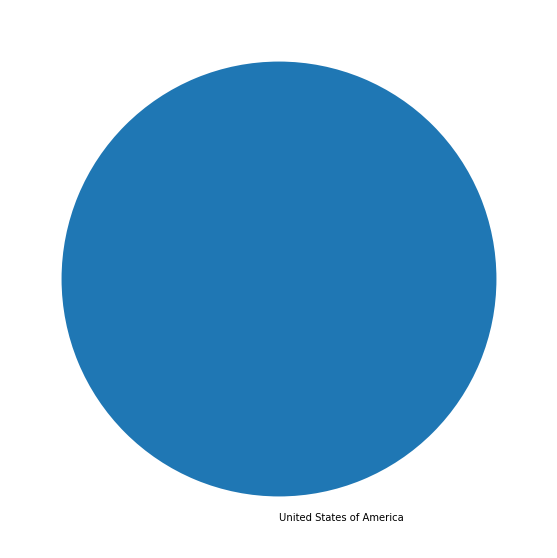

In [154]:
st.title("Number of athletes per country at the Tokyo 2020 olympics")
no = st.slider('Number of countries to show:', 1, 206)
st.header("Table")
st.write(df_country_total[0:no])

# create piechart
x = list(df_country_total['no_athletes'][0:no])
labels = list(df_country_total['country'][0:no])
fig = plt.figure(figsize=(10,10))
plt.pie(x=x, labels=labels, startangle=90, counterclock=False);

st.header("Piechart")
st.pyplot(fig)

# Create nice plots

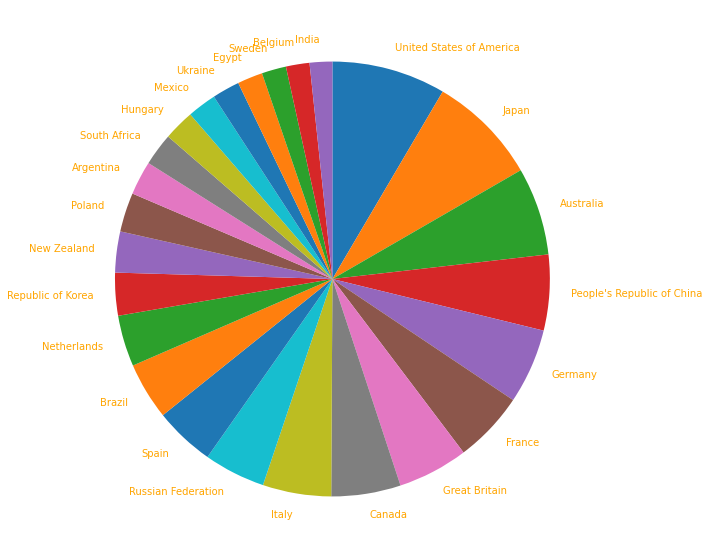

In [134]:
# create piechart
x = list(df_country_total['no_athletes'][0:25])
labels = list(df_country_total['country'][0:25])

fig = plt.figure(figsize=(10,10))
plt.pie(x=x, labels=labels, startangle=90, textprops=dict(color ="orange"), counterclock=False);

<BarContainer object of 10 artists>

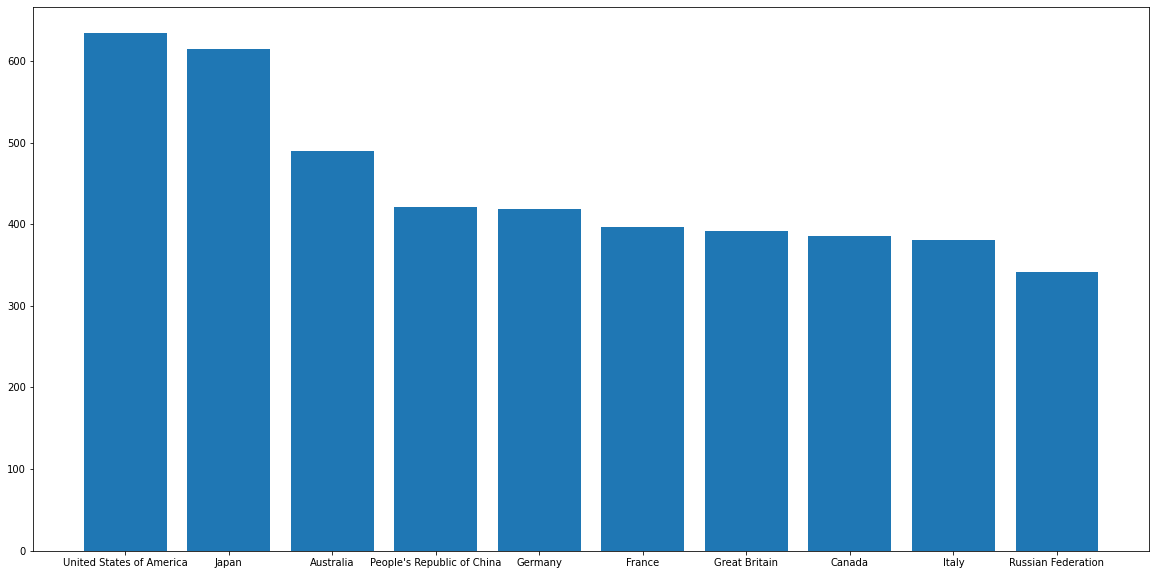

In [121]:
# simple bar plot
labels = list(df_country_total['no_athletes'][0:10])
x = list(df_country_total['country'][0:10])

plt.figure(figsize=(20,10));
display(plt.bar(x, labels))

# Automate import tables

In [155]:
# id's different tables

medals_table_id = 'de2021-iona-325413:assignment2.medals_table'
overview_athletes_disc_per_country_id = 'de2021-iona-325413:assignment2.prop_coach_athlete_cty'
prop_female_tech_disc_id = 'de2021-iona-325413:assignment2.prop_female_tech_disc'
short_tall_disc_id = 'de2021-iona-325413:assignment2.short_tall_disc'
top_disc_per_country_id = 'de2021-iona-325413:assignment2.top_disc_per_country'
young_old_disc_id = 'de2021-iona-325413:assignment2.young_old_disc'

def fetch_data(table_name, gbq_project_id):
    sql = "sql_" + str(table_name)
    df = pandas_gbq.read_gbq(sql, project_id=gbq_project_id, dialect="standard")
    return df

In [38]:
# make docstrings (https://izziswift.com/how-to-put-a-variable-into-python-docstring/)

def f():
    pass
f.__doc__ = """ SELECT * FROM `%s`""" % (medals_table_id)

f.__doc__

' SELECT * FROM `de2021-iona-325413:assignment2.medals_table`'